##### Background:

In end user perspective, travel and tourism is mostly explorative in nature and repetitive travels to same locations are minimal. So, travellers have to take decisions regarding their destinations and associated facilities to be consumed without adequate prior or personal knowledge. The best option available is to leverage social media and internet. Tourism recommenders are the best solutions in this scenario.

##### Dataset file name: tripadvisor_review.csv

##### Dataset description:

User’s average feedback/rating information on 10 categories of attractions in East Asia captured from tripadvisor.com. Dataset contains 980 user records with 10 feedback attributes inferred from numerous destination reviews

#### 1. Apply component factor- and projection-based dimensionality reduction approaches on the given dataset (tripadvisor_review.csv) for creating three collective variables using UMAP. Does this new feature space improve the grouping of travellers compared to original dataset? Present your results with appropriate evidence.

In [62]:
import pandas as pd
!pip install  hdbscan

from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.metrics import silhouette_score
import plotly.express as px
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN,KMeans,kmeans_plusplus
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,
                              AdaBoostClassifier,VotingClassifier,StackingClassifier)
from xgboost import XGBClassifier,XGBRFClassifier
# from sklearn.metrics import (accuracy_score,plot_confusion_matrix,classification_report,roc_auc_score,f1_score)
import seaborn as sns
from sklearn.cluster import DBSCAN,KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN,KMeans,kmeans_plusplus
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,
                              AdaBoostClassifier,VotingClassifier,StackingClassifier)
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,f1_score
import seaborn as sns
from sklearn.cluster import DBSCAN,KMeans
import hdbscan


In [63]:
dff = pd.read_csv('tripadvisor_review.csv')
dff.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


First we create grouping of travellers based on original dataset using all Category1..Category2.... Category10 features using KMeans clustering
Then we use UMAP dimension reduction technique on original features to create three collective variables and then create groupings of travellers

In [64]:
# Dropping UserID feature
df = dff.drop('User ID',axis = 1)
df.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [65]:
# Scaling the dataset for using KMeans clustering as it is distance based algorithm
sc = StandardScaler()
scaled_df = sc.fit_transform(df)

In [66]:
# using distortion and kmeans clustering with different number of clusters
wcss = []
clusters = range(2,20)

for k in clusters:
    km = KMeans(n_clusters=k)
    km.fit(scaled_df)
    wcss.append(km.inertia_)


fig = px.line(x=clusters, y=wcss,labels={'x':'number_of_clusters','y':'Mean_distortion'})
fig.show()


From above plot using elbow method, appropriate clusters comes out to be 6. Therefore travellers can be grouped into 6 different category travellers based on all 10 Category features

In [67]:
kmm = KMeans(n_clusters=6)
kmm.fit(scaled_df)
dff['classes'] = kmm.labels_

In [68]:
dff.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,classes
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,5
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,5
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,1
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,3
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,2


In [69]:
df_grouping = dff.groupby('classes')[['User ID']].count().rename(columns = {'User ID':'Count_of travellers'}).reset_index()
df_grouping

,classes,Count_of travellers
0,0,231
1,1,83
2,2,213
3,3,233
4,4,21
5,5,199


Above dataframe shows the number of travellers based on 6 different classes used using 10 feedback attributes

In [70]:
fig = px.bar(df_grouping, x='classes', y='Count_of travellers',title = 'Number of travellers based on classes')
fig.show()

<br>

Uniform Manifold Approximation and Projection (or UMAP) is a new dimension reduction technique that can be used to visualize patterns of clustering in high-dimensional data. Unlike PCA (but similar to other approaches such as t-SNE), it is focused on local clustering, meaning that whilst "similar" observations should be grouped together, it does not attempt to preserve the exact global structure between all observations

In [71]:
pip install umap-learn


In [72]:
import umap
from umap import UMAP

In [73]:
# creatung 3 variables using UMAP
umap_3d = UMAP(n_components=3,random_state = 1)
proj_3d = umap_3d.fit_transform(scaled_df)

In [74]:
# Running KMEANS on dataset created using UMAP with 3 projection features and checking appropriapte clusters to be formed
wcss = []
clusters = range(2,20)

for k in clusters:
    km = KMeans(n_clusters=k)
    km.fit(proj_3d)
    wcss.append(km.inertia_)
    # silhoutte_score.append(silhouette_score(scaled_df, km.labels_))

fig = px.line(x=clusters, y=wcss,labels={'x':'number_of_clusters','y':'Mean_distortion'})
fig.show()

In [75]:
umap_df = pd.DataFrame(proj_3d,columns = ['var1','var2','var3'])
umap_df.head()

,var1,var2,var3
0,3.151993,7.842515,8.630846
1,2.809413,7.531344,8.658250
2,7.687020,10.802386,8.503598
3,8.543673,8.966273,10.274078
4,5.742335,10.443721,10.246899


In [76]:
kmm = KMeans(n_clusters=6)
kmm.fit(proj_3d)
umap_df['classes'] = kmm.labels_

In [77]:
umap_df

,var1,var2,var3,classes
0,3.151993,7.842515,8.630846,3
1,2.809413,7.531344,8.658250,3
2,7.687020,10.802386,8.503598,4
3,8.543673,8.966273,10.274078,2
4,5.742335,10.443721,10.246899,4
...,...,...,...,...
975,11.829091,10.419486,6.904323,0
976,7.201106,10.462301,8.910686,4
977,11.306049,10.577350,6.800662,0
978,7.462917,10.506922,8.155504,4


In [78]:
umap_df_grouping = umap_df.groupby('classes').size().to_frame().rename(columns = {0:'Count_of_travellers'}).reset_index()
umap_df_grouping

,classes,Count_of_travellers
0,0,172
1,1,167
2,2,219
3,3,206
4,4,190
5,5,26


In [79]:
fig = px.bar(umap_df_grouping, x='classes', y='Count_of_travellers',title='Number of travellers based on classes on reduced feature space using UMAP')
fig.show()

In [80]:
fig_3d = px.scatter_3d(umap_df,x = 'var1', y = 'var2', z = 'var3',color = umap_df['classes'])
fig_3d.show()

From above 3d plot, it shows that UMAP is able segment 6 different category of travellers quite well as they are separable from each other

UMAP improves the grouping of travellers compared to original dataset


<br>

#### 2. Let’s consider the data shown in the Figure 1.

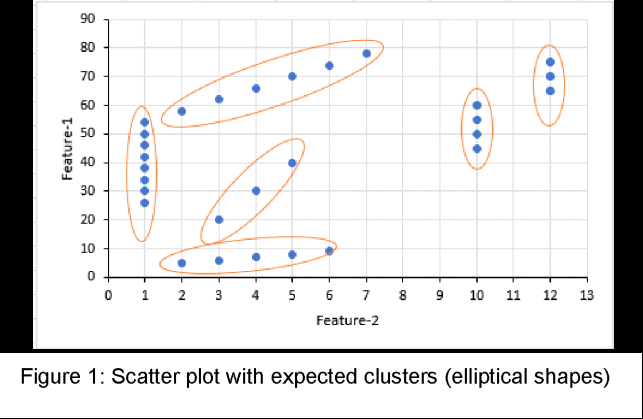

##### a. Is it possible to obtain the cluster shown in the figure by DBSCAN? Provide evidence including code and explanation to justify your findings.

K-Means and Hierarchical Clustering both fail in creating clusters of arbitrary shapes. They are not able to form clusters based on varying densities. That’s why we need DBSCAN clustering

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise.

It groups ‘densely grouped’ data points into a single cluster. It can identify clusters in large spatial datasets by looking at the local density of the data points. The most exciting feature of DBSCAN clustering is that it is robust to outliers. It also does not require the number of clusters to be told beforehand, unlike K-Means, where we have to specify the number of centroids.

DBSCAN requires only two parameters: epsilon and minPoints. Epsilon is the radius of the circle to be created around each data point to check the density and minPoints is the minimum number of data points required inside that circle for that data point to be classified as a Core point.

Parameter Selection in DBSCAN Clustering
DBSCAN is very sensitive to the values of epsilon and minPoints. Therefore, it is very important to understand how to select the values of epsilon and minPoints. A slight variation in these values can significantly change the results produced by the DBSCAN algorithm.

The value of minPoints should be at least one greater than the number of dimensions of the dataset, i.e.,

minPoints>=Dimensions+1.

It does not make sense to take minPoints as 1 because it will result in each point being a separate cluster. Therefore, it must be at least 3. Generally, it is twice the dimensions. But domain knowledge also decides its value.

The value of epsilon can be decided from the K-distance graph. The point of maximum curvature (elbow) in this graph tells us about the value of epsilon. If the value of epsilon chosen is too small then a higher number of clusters will be created, and more data points will be taken as noise. Whereas, if chosen too big then various small clusters will merge into a big cluster, and we will lose details.

Text(0.5, 1.0, 'Figure 1.')

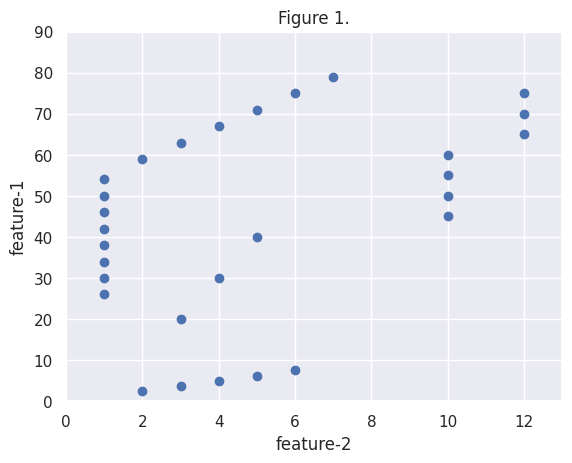

In [81]:
# Creating the above graph

x = np.ones(8)
y = np.arange(26,56,4)
df1 = pd.DataFrame({'feature-2':x,'feature-1':y})

x = np.array([2, 3, 4, 5, 6, 7])
y = 4 * x + 51
df2 = pd.DataFrame({'feature-2':x,'feature-1':y})

x = np.array([3, 4, 5])
y = np.array([20,30,40])
df3 = pd.DataFrame({'feature-2':x,'feature-1':y})

x = np.array(list(range(2,7)))
y = ((10-5)/(6-2)) * x
df4 = pd.DataFrame({'feature-2':x,'feature-1':y})


x = np.ones(4) * 10
y = np.array([45,50,55,60])
df5 = pd.DataFrame({'feature-2':x,'feature-1':y})


x = np.ones(3) * 12
y = np.array([65,70,75])
df6 = pd.DataFrame({'feature-2':x,'feature-1':y})


df = df1.append(df2).append(df3).append(df4).append(df5).append(df6)

dff = df.copy()

sns.set()
plt.scatter(x = df['feature-2'],y = df['feature-1'])
plt.ylim((0,90))
plt.xlim((0,13))
plt.xlabel('feature-2')
plt.ylabel('feature-1')
plt.title('Figure 1.')


 Let’s first run DBSCAN without any parameter optimization and see the results

<Axes: xlabel='feature-2', ylabel='feature-1'>

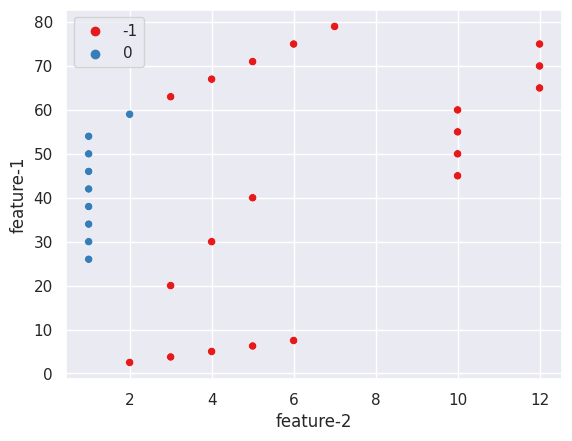

In [82]:
db  = DBSCAN()
sc = StandardScaler()
labels = db.fit_predict(sc.fit_transform(df))
# labels
sns.scatterplot(data = df,x = df['feature-2'],y = df['feature-1'],hue=labels,palette='Set1')

From above plot, by running DBSCAN using default settings, the algorithm is not able to create 6 clusters.
It only creates 1 cluster ( 0 ) and another is a cluster of outliers (-1)<br>
Now we try to optimize the epsilon parameter and check if the results can be improved or not

For epsilon, I am using the K-distance graph. For plotting a K-distance Graph, we need the distance between a point and its nearest data point for all data points in the dataset. We obtain this using NearestNeighbors from sklearn.neighbors.

In [83]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(sc.fit_transform(df))
distances, indices = nbrs.kneighbors(sc.fit_transform(df))

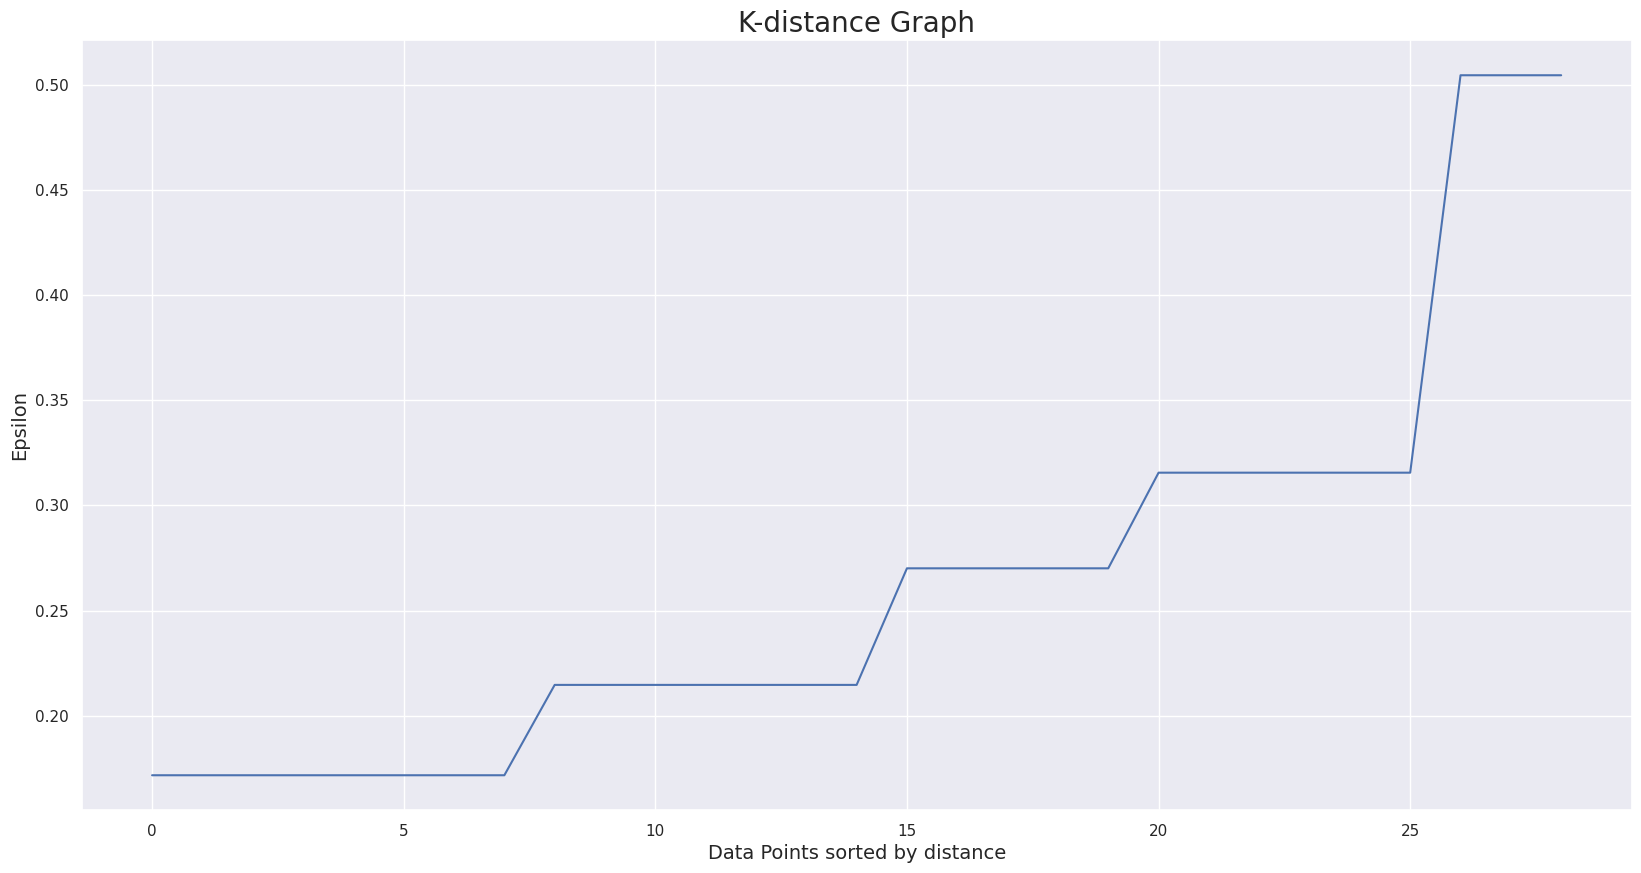

In [84]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which cannot be checked using above graph in this case. <br> So we run the algorithm using range of epsilon values from (0.5 - 1) and check the grouping

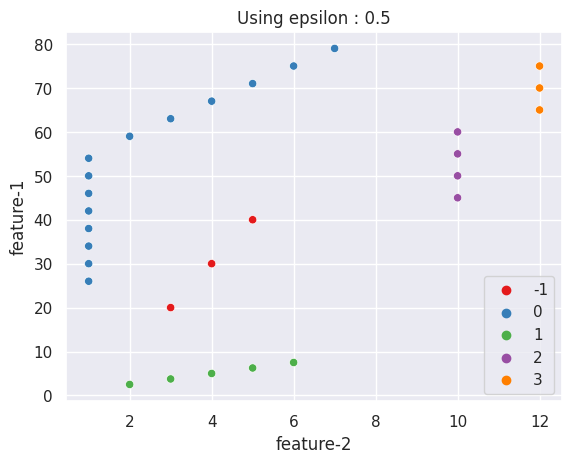

In [85]:
db  = DBSCAN(eps=0.5,min_samples=3)
sc = StandardScaler()
labels = db.fit_predict(sc.fit_transform(df))
sns.scatterplot(data = df,x = df['feature-2'],y = df['feature-1'],hue=labels,palette='Set1')
plt.title('Using epsilon : 0.5');

Using epsilon = 0.5 ,dbscan is able to create 4 clusters (0,1,2,3) and 1 outlier cluster (-1)




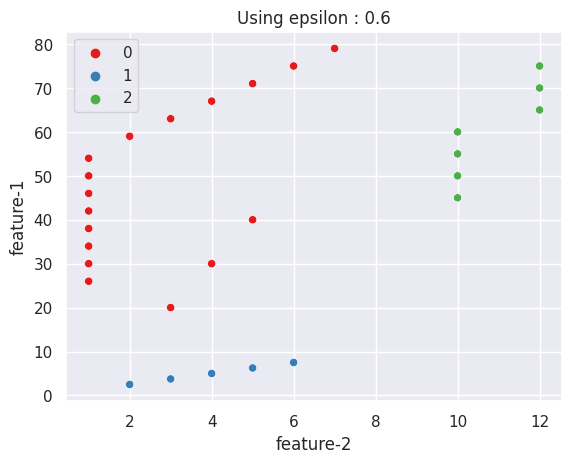

In [86]:
db  = DBSCAN(eps=0.6,min_samples=3)
sc = StandardScaler()
labels = db.fit_predict(sc.fit_transform(df))
sns.scatterplot(data = df,x = df['feature-2'],y = df['feature-1'],hue=labels,palette='Set1')
plt.title('Using epsilon : 0.6');

Using epsilon = 0.6 ,dbscan is able to create 3 clusters (0,1,2)

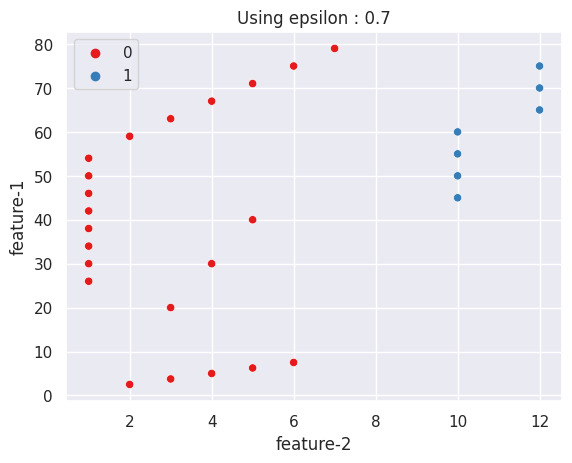

In [87]:
db  = DBSCAN(eps=0.7,min_samples=3)
sc = StandardScaler()
labels = db.fit_predict(sc.fit_transform(df))
sns.scatterplot(data = df,x = df['feature-2'],y = df['feature-1'],hue=labels,palette='Set1')
plt.title('Using epsilon : 0.7');

Using epsilon = 0.7 ,dbscan is able to create 2 clusters (0,1)



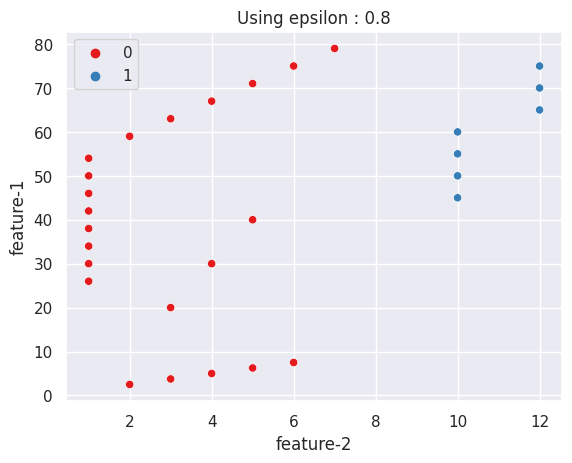

In [88]:
db  = DBSCAN(eps=0.8,min_samples=3)
sc = StandardScaler()
labels = db.fit_predict(sc.fit_transform(df))
sns.scatterplot(data = df,x = df['feature-2'],y = df['feature-1'],hue=labels,palette='Set1')
plt.title('Using epsilon : 0.8');

Using epsilon = 0.8 ,dbscan is able to create 2 clusters (0,1)



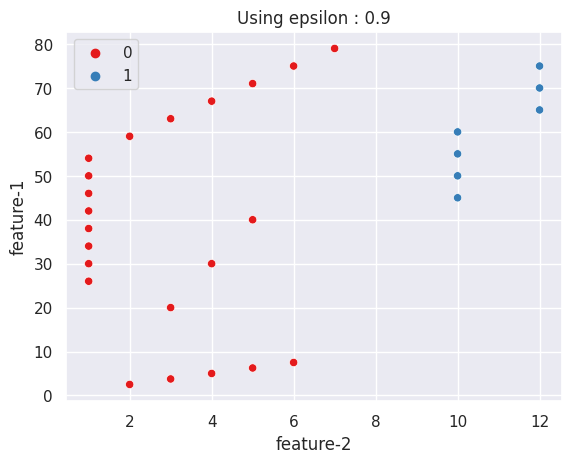

In [89]:
db  = DBSCAN(eps=0.9,min_samples=3)
sc = StandardScaler()
labels = db.fit_predict(sc.fit_transform(df))
sns.scatterplot(data = df,x = df['feature-2'],y = df['feature-1'],hue=labels,palette='Set1')
plt.title('Using epsilon : 0.9');

Using epsilon = 0.9 ,dbscan is able to create 2 clusters (0,1)



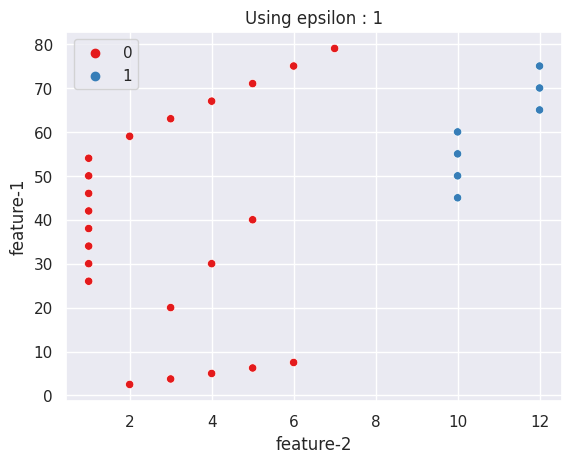

In [90]:
db  = DBSCAN(eps=1,min_samples=3)
sc = StandardScaler()
labels = db.fit_predict(sc.fit_transform(df))
sns.scatterplot(data = df,x = df['feature-2'],y = df['feature-1'],hue=labels,palette='Set1')
plt.title('Using epsilon : 1');

Using epsilon = 1 ,dbscan is able to create 2 clusters (0,1)



By using different epsilon values , DBSCAN is not able to completely segment the features1 & feature2 into 6 given clusters

<br>

#### b. Explore state-of-the-art clustering methods (explore recent research articles) that can produce better results than DBSCAN for this problem? Describe the selected approach, evaluate performance and report your findings.

For This , we implement different clustering algorithms such as<br>Hierarchical Clustering<br>KMeans Clustering<br>Gaussian Mixture Models<br>HDBSCAN<br>OPTICS<br><br>and evaluate the results based on the clusters formed by them

What is Hierarchical Clustering?
Hierarchical clustering is an unsupervised learning technique used to group similar objects into clusters. It creates a hierarchy of clusters by merging or splitting them based on similarity measures.

Hierarchical clustering groups similar objects into a dendrogram. It merges similar clusters iteratively, starting with each data point as a separate cluster. This creates a tree-like structure that shows the relationships between clusters and their hierarchy.

The dendrogram from hierarchical clustering reveals the hierarchy of clusters at different levels, highlighting natural groupings in the data. It provides a visual representation of the relationships between clusters<br>
To get the number of clusters for hierarchical clustering, we make use of an awesome concept called a Dendrogram

Hierarchical Clustering

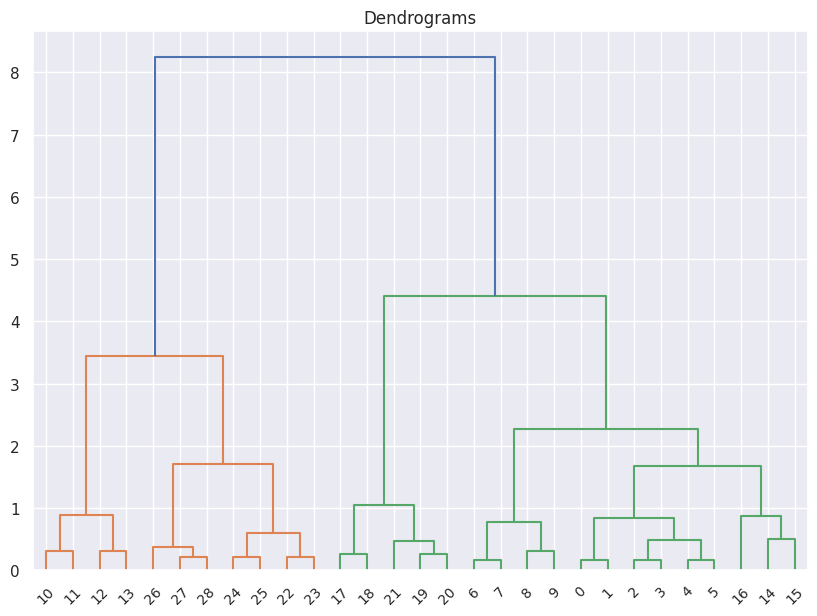

In [91]:
# Creating dendogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(sc.fit_transform(df), method='ward'))

From above Dendogram, it shows that there should be 2 clusters,but we try to create 6 clusters as well to check if Hierarchical Clustering is able to segment feature1 & feature2 into 6 clusters or not.

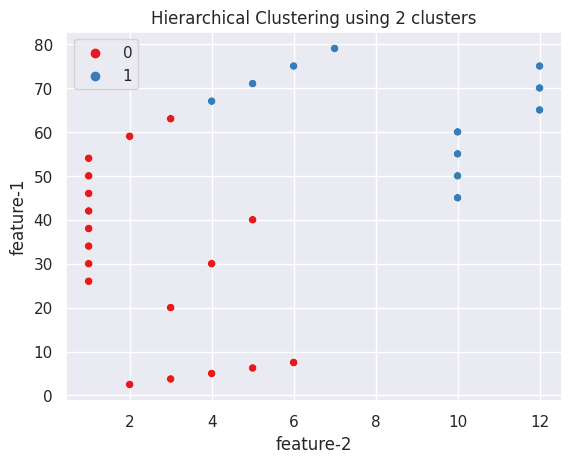

In [92]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(sc.fit_transform(df))
sns.scatterplot(data = df,x = df['feature-2'],y = df['feature-1'],hue=cluster.labels_,palette='Set1')
plt.title('Hierarchical Clustering using 2 clusters');

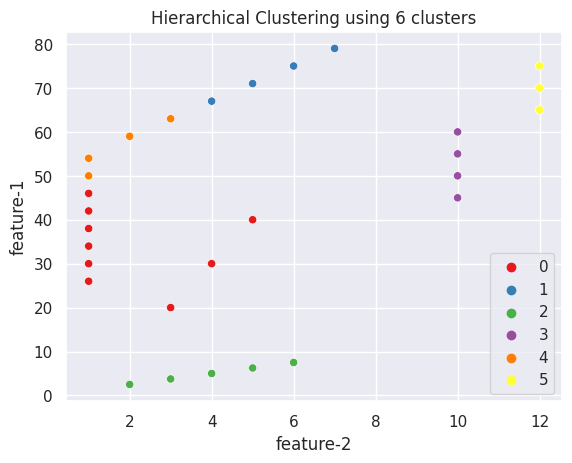

In [93]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster.fit_predict(sc.fit_transform(df))
sns.scatterplot(data = df,x = df['feature-2'],y = df['feature-1'],hue=cluster.labels_,palette='Set1')
plt.title('Hierarchical Clustering using 6 clusters');

From Above ,Hierarchical Clustering is able to produce better results than DBSCAN but fails to segment feature1 & feature2 into 6 clusters as shown in the problem statement<br>
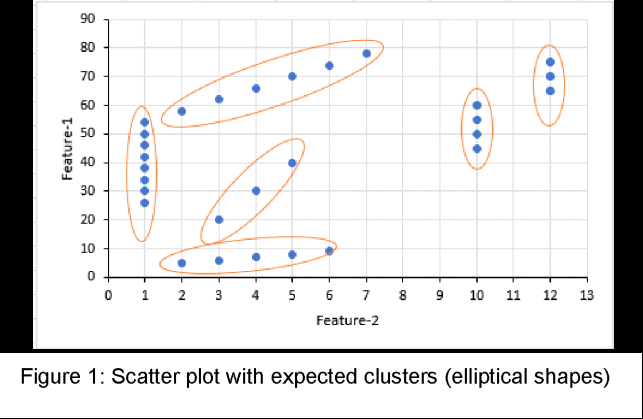

<br>

k-means clustering

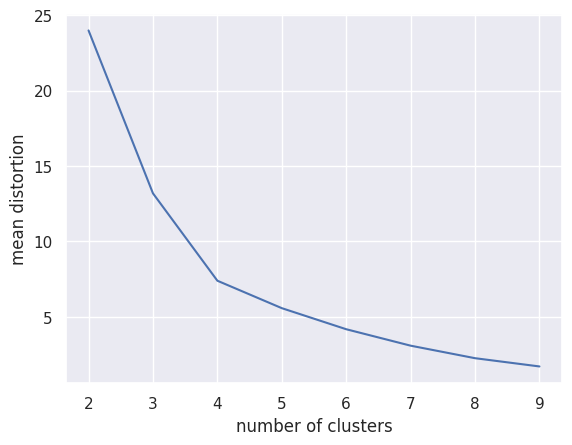

In [94]:
wcss = []
cluster = [2,3,4,5,6,7,8,9]
for k in cluster:
    km = KMeans(n_clusters=k)
    km.fit(sc.fit_transform(df))
    dist = km.inertia_
    wcss.append(dist)

plt.plot(cluster,wcss)
plt.xlabel('number of clusters')
plt.ylabel('mean distortion');

Using elbow method from above curve,Kmeans algorithm is run using 4,5 & 6 clusters

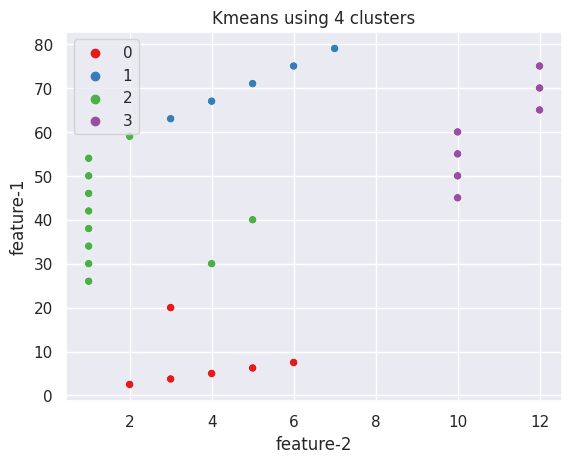

In [95]:
k = KMeans(n_clusters=4)
sc = StandardScaler()
k_labels = k.fit_predict(sc.fit_transform(df))
sns.scatterplot(data = df,x = df['feature-2'],y = df['feature-1'],hue=k_labels,palette='Set1')
plt.title('Kmeans using 4 clusters');

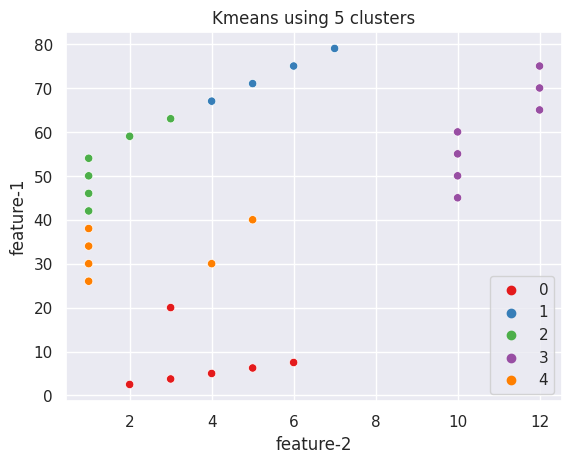

In [96]:
k = KMeans(n_clusters=5)
sc = StandardScaler()
k_labels = k.fit_predict(sc.fit_transform(df))
sns.scatterplot(data = df,x = df['feature-2'],y = df['feature-1'],hue=k_labels,palette='Set1')
plt.title('Kmeans using 5 clusters');

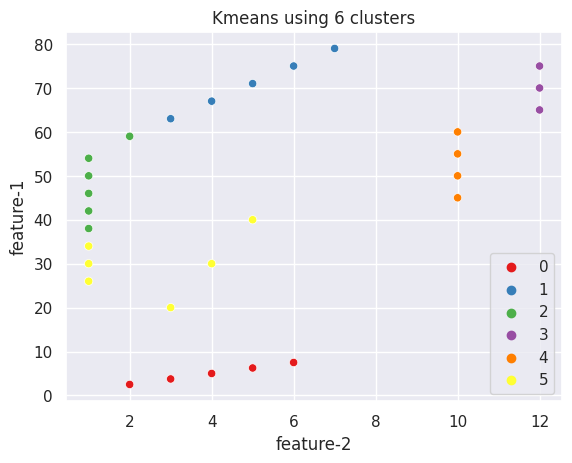

In [97]:
k = KMeans(n_clusters=6)
sc = StandardScaler()
k_labels = k.fit_predict(sc.fit_transform(df))
sns.scatterplot(data = df,x = df['feature-2'],y = df['feature-1'],hue=k_labels,palette='Set1')
plt.title('Kmeans using 6 clusters');

From Above ,Kmeans Clustering is able to produce better results than DBSCAN but fails to segment feature1 & feature2 into 6 clusters as shown in the problem statement<br>
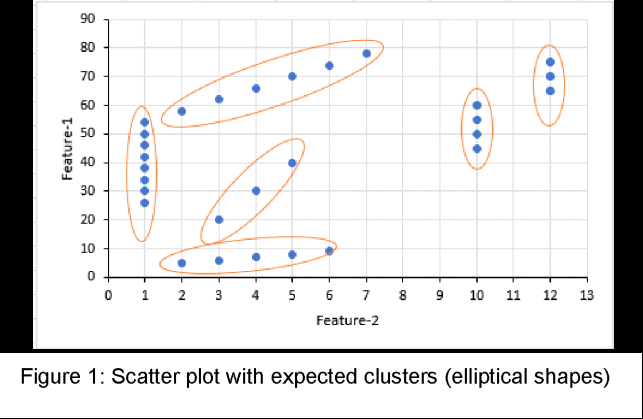

<br>

So instead of using a distance-based model (KMeans,Hierarchical clustering), we will now use a distribution-based model. And that is where Gaussian Mixture Models

The Gaussian Mixture Model (GMM) is a probabilistic model used for clustering and density estimation. It assumes that the data is generated from a mixture of several Gaussian distributions, each representing a distinct cluster. GMM assigns probabilities to data points, allowing them to belong to multiple clusters simultaneously. The model is widely used in machine learning and pattern recognition applications.

Gaussian Mixture Models (GMMs) assume that there are a certain number of Gaussian distributions, and each of these distributions represent a cluster. Hence, a Gaussian Mixture Model tends to group the data points belonging to a single distribution together.<br>
Gaussian Mixture Models are probabilistic models and use the soft clustering approach for distributing the points in different clusters.

Gaussian Mixture Models use the soft clustering technique for assigning data points to Gaussian distributions


GMM estimates the parameters of these Gaussians to identify the underlying clusters and their corresponding probabilities, allowing it to handle complex data distributions and overlapping clusters.<br>
GMM identifies underlying clusters in data, accommodating non-spherical clusters and overlapping patterns

<Axes: xlabel='feature-2', ylabel='feature-1'>

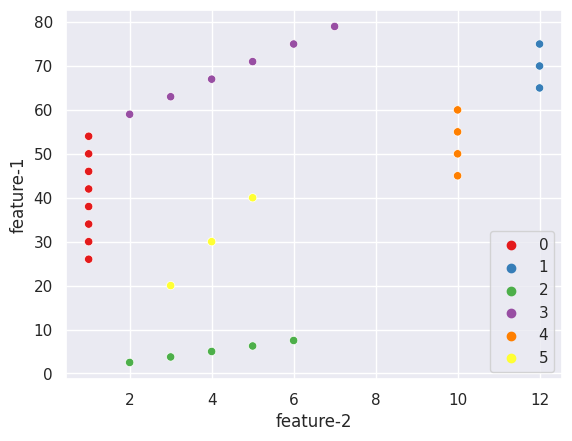

In [98]:
from sklearn.mixture import GaussianMixture
gaussian_model = GaussianMixture(n_components=6,random_state=1)
labels = gaussian_model.fit_predict(sc.fit_transform(df))
sns.scatterplot(data = df,x = df['feature-2'],y = df['feature-1'],hue=labels,palette='Set1')
# plt.ylim((0,90))
# plt.xlim((0,13))

From Above ,Gaussian Mixture Models Clustering is able to produce better results than DBSCAN and able to segment feature1 & feature2 into 6 clusters as shown in the problem statement<br>
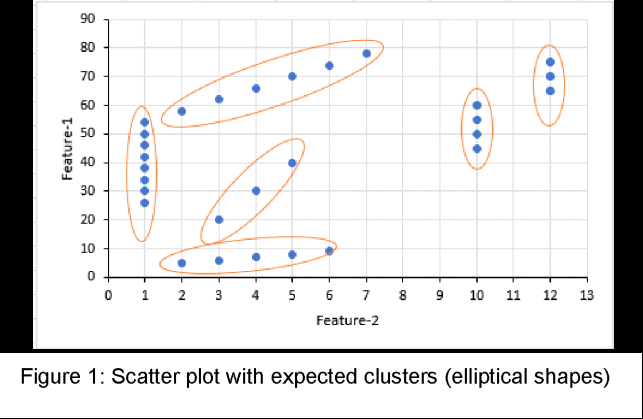

<br>

**HDBSCAN**<br>
HDBSCAN - Hierarchical Density-Based Spatial Clustering of Applications with Noise. Performs DBSCAN over varying epsilon values and integrates the result to find a clustering that gives the best stability over epsilon. This allows HDBSCAN to find clusters of varying densities (unlike DBSCAN), and be more robust to parameter selection.

In practice this means that HDBSCAN returns a good clustering straight away with little or no parameter tuning -- and the primary parameter, minimum cluster size, is intuitive and easy to select.

**Parameter Selection for HDBSCAN**<br>
Selecting **min_cluster_size**<br>The primary parameter to effect the resulting clustering is min_cluster_size. Ideally this is a relatively intuitive parameter to select – set it to the smallest size grouping that you wish to consider a cluster.<br><br>Selecting **min_samples**<br>Since we have seen that min_samples clearly has a dramatic effect on clustering, the question becomes: how do we select this parameter? The simplest intuition for what min_samples does is provide a measure of how conservative you want you clustering to be. The larger the value of min_samples you provide, the more conservative the clustering – more points will be declared as noise, and clusters will be restricted to progressively more dense areas.

In [99]:
import hdbscan
sc = StandardScaler()

In [100]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(sc.fit_transform(df))

HDBSCAN(gen_min_span_tree=True)

Text(0.5, 1.0, 'min_cluster_size : 5')

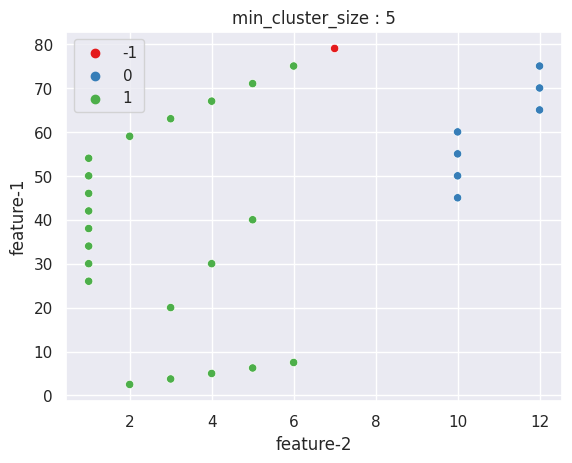

In [101]:
clusterer.labels_
sns.scatterplot(data = df,x = df['feature-2'],y = df['feature-1'],hue=clusterer.labels_,palette='Set1')
plt.title('min_cluster_size : 5')


Text(0.5, 1.0, 'min_cluster_size : 2 & min_samples = 1')

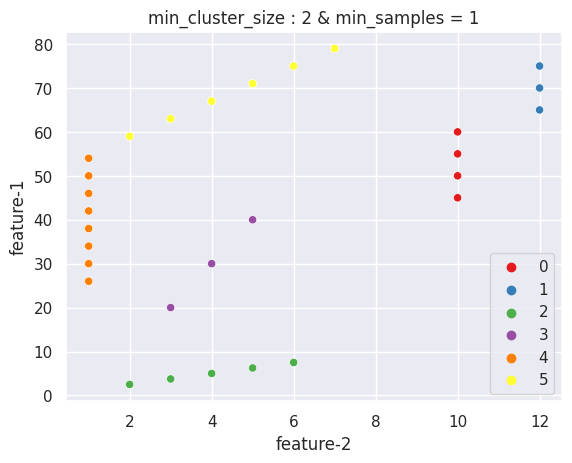

In [102]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=2,min_samples=1, gen_min_span_tree=True)
clusterer.fit(sc.fit_transform(df))
sns.scatterplot(data = df,x = df['feature-2'],y = df['feature-1'],hue=clusterer.labels_,palette='Set1')
plt.title('min_cluster_size : 2 & min_samples = 1')



<BR>

From Above ,HDBSCAN  is able to produce better results than DBSCAN and able to segment feature1 & feature2 into 6 clusters as shown in the problem statement<br>
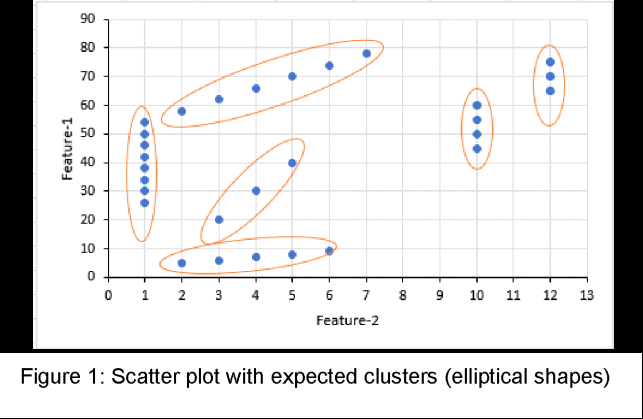

<br>

**OPTICS**<BR>OPTICS is a density-based clustering algorithm that can discover clusters of arbitrary shape and handle noise effectively. It aims to identify the density-based clustering structure of a dataset by ordering points based on their density reachability. The algorithm produces a reachability plot, also known as the OPTICS plot, which provides valuable insights into the clustering structure and helps determine the optimal parameters for clustering<br>A density-based clustering approach is **Ordering Points To Identify Clustering Structure** (OPTICS)<br>The essential principle of density-based clustering is that the neighbourhood of a certain radius must contain at least a minimal number of objects (MinPts), i.e. the cardinality of the neighbourhood must surpass a threshold. OPTICS generates a database order, storing the core distance and a reasonable reachability distance for each item.

Text(0.5, 1.0, 'using eps=0.5, min_samples=5')

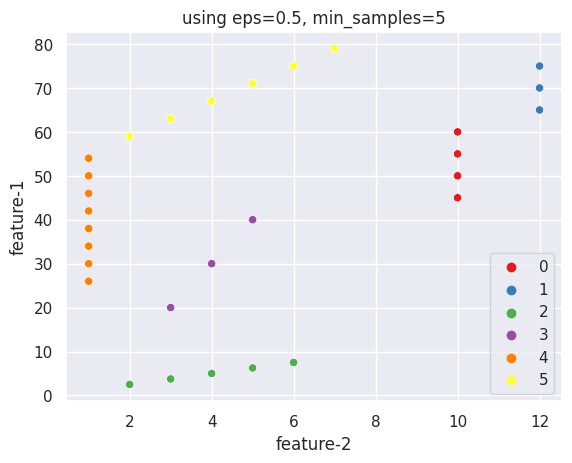

In [103]:
from sklearn.cluster import OPTICS

# Create an instance of OPTICS with desired parameters
optics = OPTICS(eps=0.5, min_samples=5)

# Fit the OPTICS model to the dataset
optics.fit(sc.fit_transform(df))

# Retrieve the labels assigned to each data point
labels = optics.labels_
sns.scatterplot(data = df,x = df['feature-2'],y = df['feature-1'],hue=clusterer.labels_,palette='Set1')
plt.title('using eps=0.5, min_samples=5')


From Above ,OPTICS  is able to produce better results than DBSCAN and able to segment feature1 & feature2 into 6 clusters as shown in the problem statement<br>
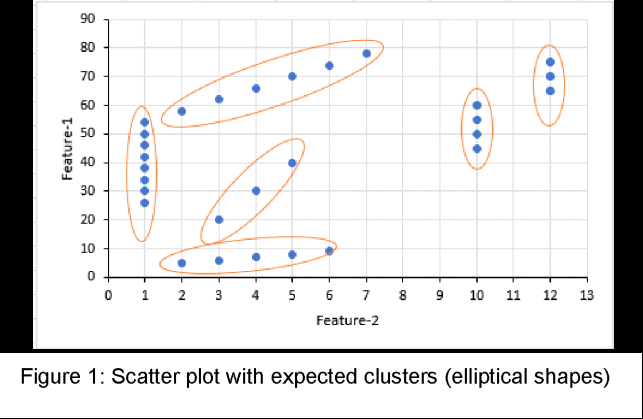

<br><br><br>

##### Background

The recently started human and other genome projects are likely to change the situation of molecular biology. Comprehensive analyses of whole genomic sequences will enable us to understand the general mechanisms of how protein and nucleic acid functions are encoded in the sequence data.

##### Dataset filename: yeast2vs4.csv

##### Dataset description:

There are 8 features and one target in the dataset. All the features are in a numerical format, and the target is in text format

In [104]:
df_y = pd.read_csv('yeast2vs4.csv')
df_y.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
0,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,negative
1,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,negative
2,0.40,0.42,0.57,0.35,0.5,0.0,0.53,0.25,negative
3,0.46,0.44,0.52,0.11,0.5,0.0,0.50,0.22,negative
4,0.47,0.39,0.50,0.11,0.5,0.0,0.49,0.40,negative


#### 3. Build three ensemble models (including voting classifier) for predicting presence or absence of protein

In [105]:
df_y['class'].value_counts()

negative    463
positive     51
Name: class, dtype: int64

In [106]:
# Converting text target column into numerical target column
def target(val):
    if val == 'negative':
        return 0
    else:
        return 1

df_y['class'] = df_y['class'].apply(target)
df_y.head(10)

,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
0,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,0
1,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,0
2,0.40,0.42,0.57,0.35,0.5,0.0,0.53,0.25,0
3,0.46,0.44,0.52,0.11,0.5,0.0,0.50,0.22,0
4,0.47,0.39,0.50,0.11,0.5,0.0,0.49,0.40,0
5,0.45,0.40,0.50,0.16,0.5,0.0,0.50,0.22,0
6,0.43,0.44,0.48,0.22,0.5,0.0,0.51,0.22,0
7,0.73,0.63,0.42,0.30,0.5,0.0,0.49,0.22,0
8,0.43,0.53,0.52,0.13,0.5,0.0,0.55,0.22,0
9,0.46,0.53,0.52,0.15,0.5,0.0,0.58,0.22,0


In [107]:
df_y.columns

Index(['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'class'], dtype='object')

In [108]:
X = df_y.drop(columns=['class'])
y = df_y['class']

In [109]:
# y.value_counts() , y_res.value_counts()
100 * y.value_counts() / len(y)

0    90.077821
1     9.922179
Name: class, dtype: float64

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [112]:
X_train.shape , X_test.shape

((359, 8), (155, 8))

In [113]:
X_train.shape

(359, 8)

In [114]:
X_train.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
94,0.41,0.39,0.51,0.52,0.5,0.0,0.49,0.22
311,0.56,0.52,0.46,0.17,0.5,0.0,0.49,0.73
367,0.62,0.60,0.54,0.22,0.5,0.0,0.54,0.27
23,0.47,0.39,0.59,0.15,0.5,0.0,0.57,0.22
271,0.37,0.30,0.62,0.43,0.5,0.0,0.44,0.39


##### a. When do you want to use ensemble models over other ML models? Explain with the context of this problem.

Ensemble learning is a general meta approach to machine learning that seeks better predictive performance by combining the predictions from multiple models.

Here we are using Logistic Regression on the dataset and check the performance

In [115]:
logit = LogisticRegression()
logit.fit(X_train,y_train)
y_pred = logit.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       141
           1       1.00      0.07      0.13        14

    accuracy                           0.92       155
   macro avg       0.96      0.54      0.54       155
weighted avg       0.92      0.92      0.88       155



From above classification report,<br>**Base-model-LogisticRegression** is not able to perform well on above data<br>accuracy is good but recall score is very poor.<br>This is because we are dealing with **imbalanced dataset** and recall score aims to predict the relevant classes (specially minority class -> 1)<br>Ensemble methods offer several advantages over single models, such as improved accuracy and performance, especially for **complex and noisy problems**. They can also reduce the risk of overfitting and underfitting by balancing the trade-off between bias and variance, and by using different subsets and features of the data<br><br>



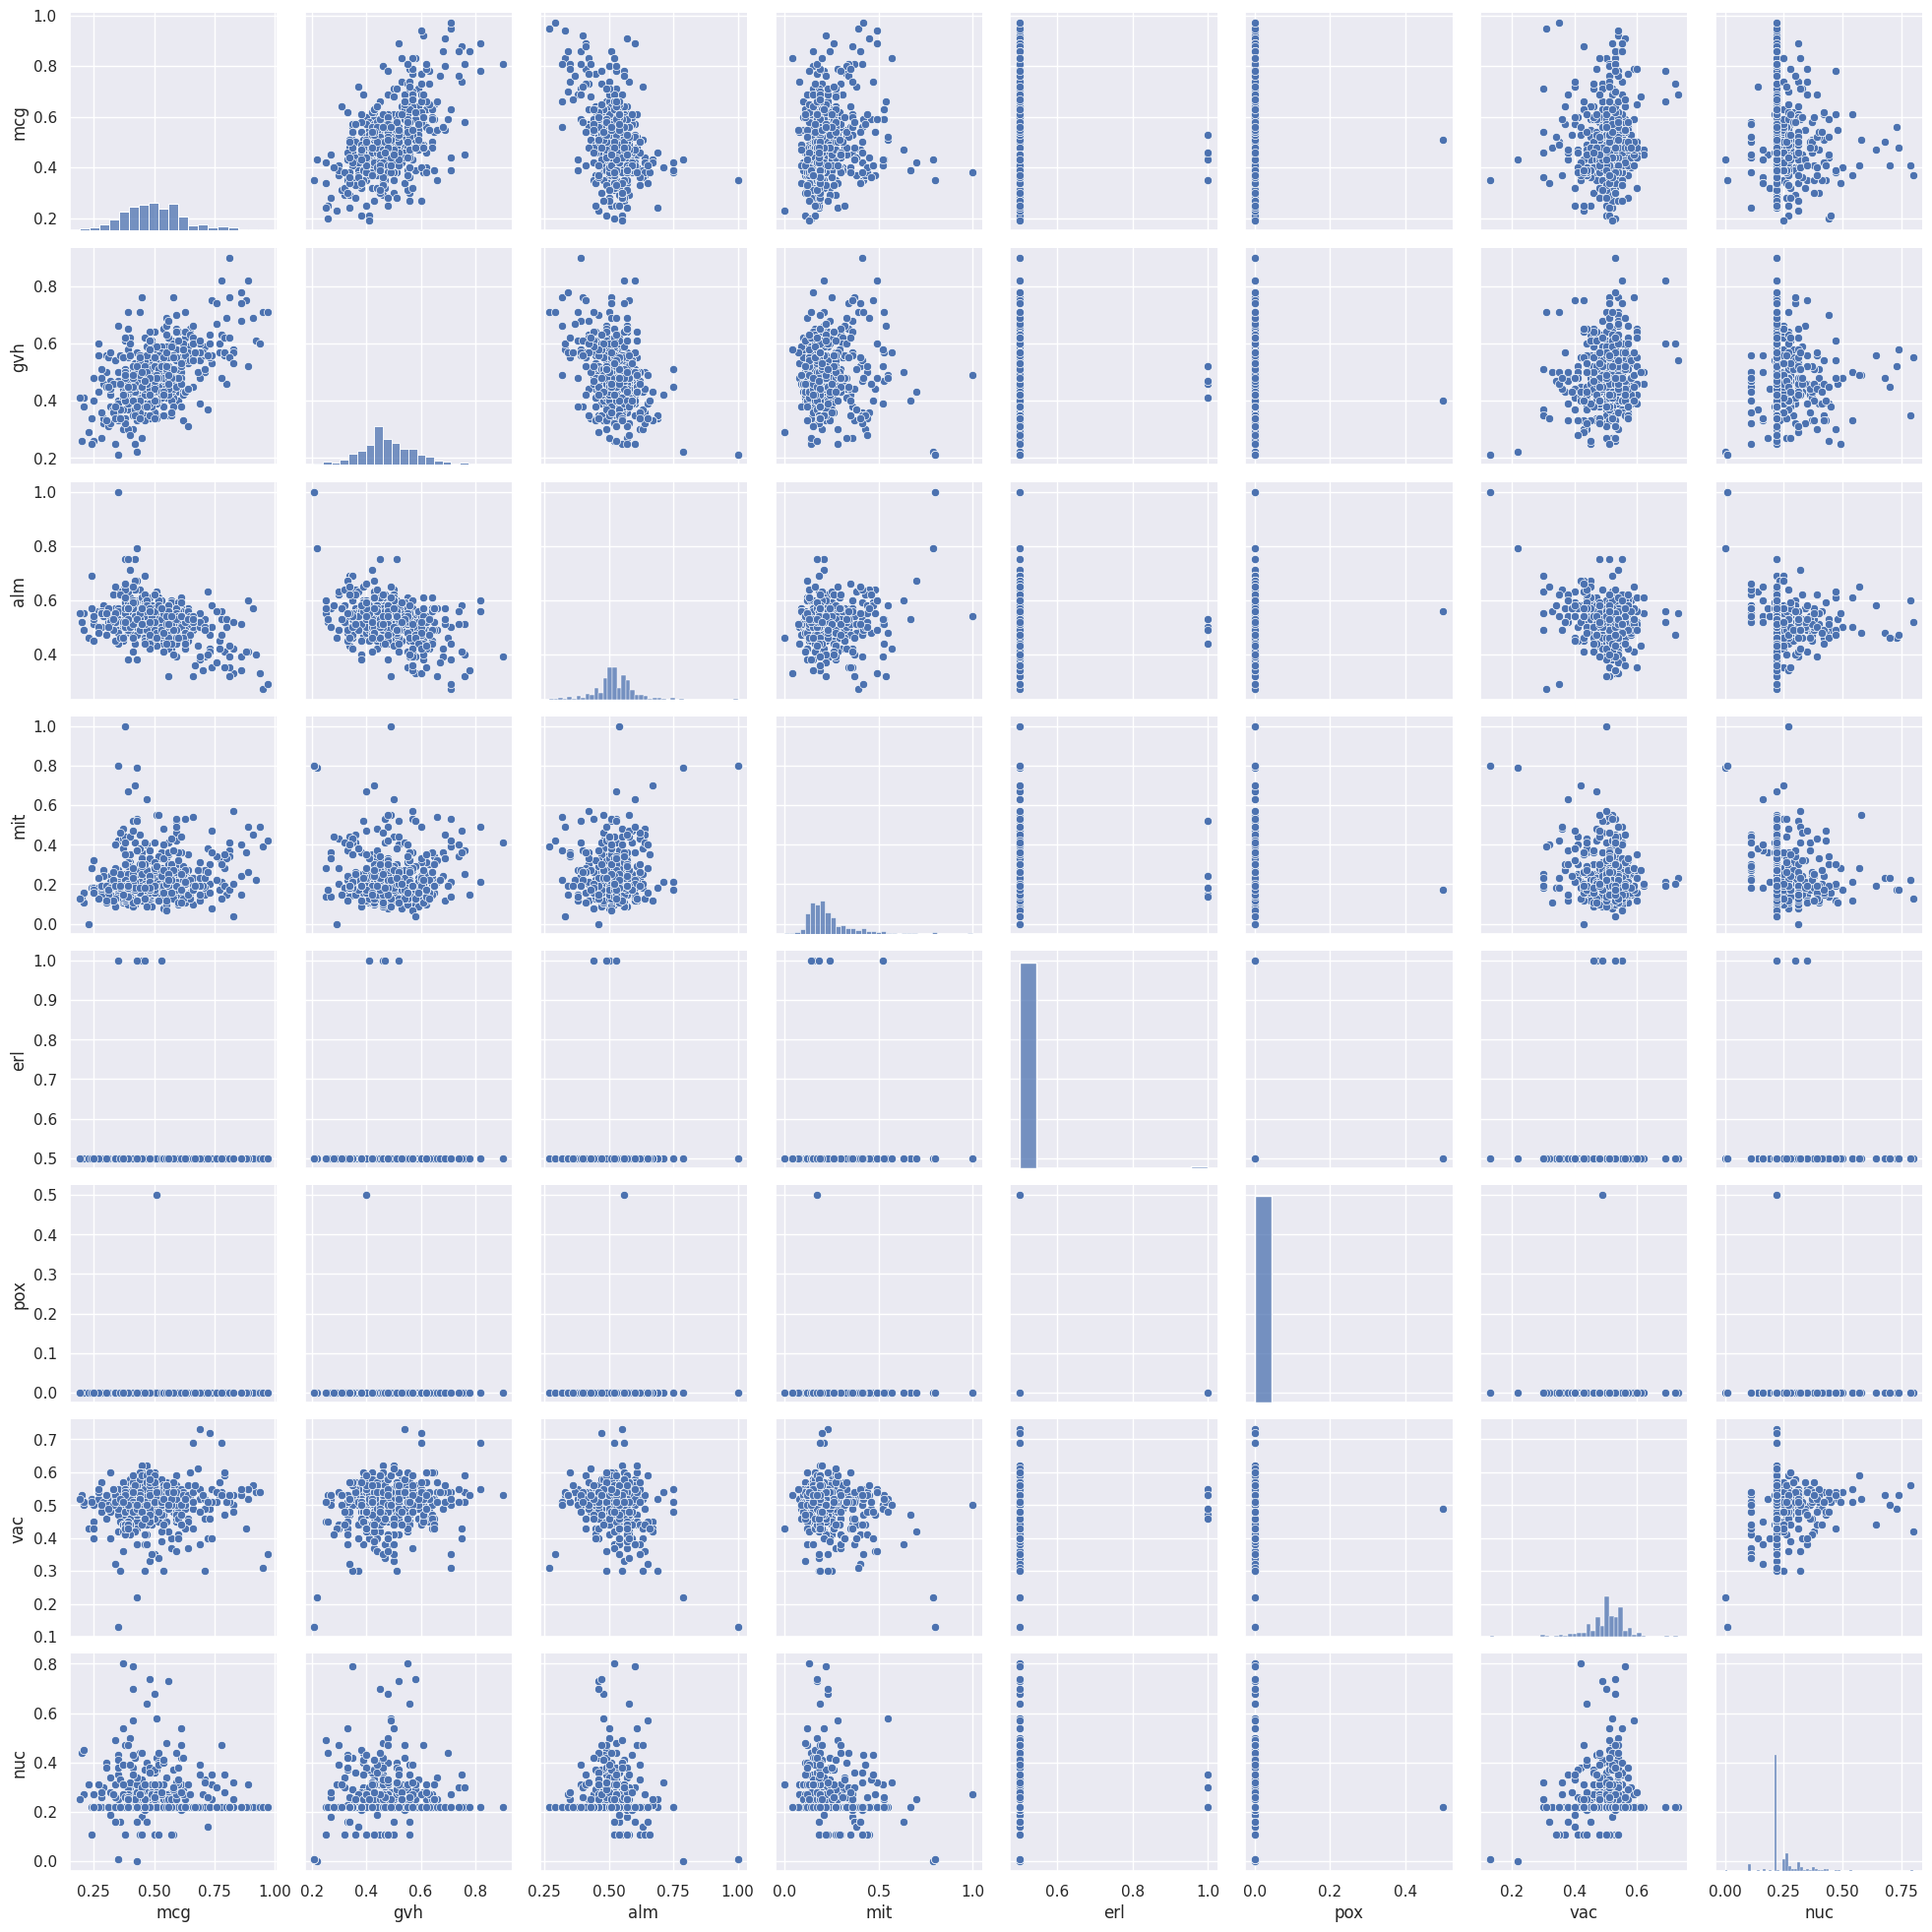

In [116]:
sns.pairplot(X)

From above pairplots, data seems to have **noise**<br>Ensembles are used to achieve better predictive performance on a predictive modeling problem than a single predictive model. The way this is achieved can be understood as the model reducing the variance component of the prediction error by adding bias

Therefore we are using Ensemble learning<br><br>
For this we are creating 3 ensemble models<br>ems_1_model<br>ems_2_model<br>*ems_3_model*

<br>

##### b. What are the similarities or differences between these models?

The three main classes of ensemble learning methods are bagging, stacking, and boosting,

Bagging involves fitting many decision trees on different samples of the same dataset and averaging the predictions.

Bagging Ensemble Learning
Bootstrap aggregation, or bagging for short, is an ensemble learning method that seeks a diverse group of ensemble members by varying the training data.<br>It creates a different training subset from sample training data with replacement & the final output is based on majority voting. For example,  Random Forest.

The following steps explain the working Random Forest Algorithm:

Step 1: Select random samples from a given data or training set.

Step 2: This algorithm will construct a decision tree for every training data.

Step 3: Voting will take place by averaging the decision tree.

Step 4: Finally, select the most voted prediction result as the final prediction result.

In [117]:
ems_1_model = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
ems_1_model.fit(X_train,y_train)
y_pred = ems_1_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       141
           1       0.93      0.93      0.93        14

    accuracy                           0.99       155
   macro avg       0.96      0.96      0.96       155
weighted avg       0.99      0.99      0.99       155



Here, recall score & precision are increased to a good value of 0.93 each

<br><br>

Boosting Ensemble Learning
Boosting is an ensemble method that seeks to change the training data to focus attention on examples that previous fit models on the training dataset have gotten wrong.The term boosting refers to a family of algorithms that are able to convert weak learners to strong learners

The key property of boosting ensembles is the idea of correcting prediction errors. The models are fit and added to the ensemble sequentially such that the second model attempts to correct the predictions of the first model, the third corrects the second model, and so on.<br>One such example is GradientBoostingClassifier

**Gradient boosting explained**<br>
Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error. How are the targets calculated? The target outcome for each case in the data depends on how much changing that case's prediction impacts the overall prediction error:
<br>
If a small change in the prediction for a case causes a large drop in error, then next target outcome of the case is a high value. Predictions from the new model that are close to its targets will reduce the error.
If a small change in the prediction for a case causes no change in error, then next target outcome of the case is zero. Changing this prediction does not decrease the error.<br>
The name gradient boosting arises because target outcomes for each case are set based on the gradient of the error with respect to the prediction. Each new model takes a step in the direction that minimizes prediction error, in the space of possible predictions for each training case

In [118]:
ems_2_model = GradientBoostingClassifier()
ems_2_model.fit(X_train,y_train)
y_pred = ems_2_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       141
           1       0.87      0.93      0.90        14

    accuracy                           0.98       155
   macro avg       0.93      0.96      0.94       155
weighted avg       0.98      0.98      0.98       155



Here ,using Boosting ensemble, precision & recall score are increased to decent value

c. Is there any preferable scenario for using any specific model among the set of ensemble models?

**Explainability**
In many situations, explaining the results of a model is paramount. Unfortunately, many algorithms work like black boxes, and the results are hard to explain regardless of how good they are.

The lack of explainability may be a deal-breaker in those situations.
<br>An imbalanced classification problem is an example of a classification problem where the distribution of examples across the known classes is biased or skewed. The distribution can vary from a slight bias to a severe imbalance where there is one example in the minority class for hundreds, thousands, or millions of examples in the majority class or classes.

**Imbalanced classifications** pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class. This results in models that have poor predictive performance, specifically for the minority class. This is a problem because typically, the minority class is more important and therefore the problem is more sensitive to classification errors for the minority class than the majority class.<br><br>
**Distribution of data**
The distribution of a data set is the shape of the graph when all possible values are plotted on a frequency graph (showing how often they occur). Usually, we are not able to collect all the data for our variable of interest. Therefore we take a sample. This sample is used to make conclusions about the whole data set. <br>
The occurrences of **noisy data** in data set can significantly impact prediction of any meaningful information. Many empirical studies have shown that noise in data set dramatically led to decreased classification accuracy and poor prediction results.<br>
Therefore **RandomForest & GradientBoosting algorithms are used here to tackle the above issues**

##### d. Is it possible to build ensemble model using ML classifiers other than decision tree? If yes, then explain with an example

Yes,Ensemble modelling can be done without using Decisiontrees using voting classifier<br>The voting classifier is an ensemble learning method that combines several base models to produce the final optimum solution. The base model can independently use different algorithms such as KNN, Random forests, Regression, etc., to predict individual outputs.This brings diversity in the output, thus called Heterogeneous ensembling.<br> In contrast, if base models use the same algorithm to predict separate outcomes, this is called Homogeneous ensembling.

The voting classifier is divided into hard voting and Soft voting.



Hard voting is also known as majority voting. The base model's classifiers are fed with the training data individually. The models predict the output class independent of each other. The output class is a class expected by the majority of the models.

In Soft voting, Classifiers or base models are fed with training data to predict the classes out of m possible courses. Each base model classifier independently assigns the probability of occurrence of each type. In the end, the average of the possibilities of each class is calculated, and the final output is the class having the highest probability.

Here , we are using Votingclassifier with soft voting using 3 different base learners other than DecisionTrees such as:-<br>Gaussian Naive Bayes<br>SupportVectorClassifier<br>KNeighborsClassifier

In [119]:
from sklearn.naive_bayes import GaussianNB

In [120]:
ems_3_model = VotingClassifier(estimators=[('logit',GaussianNB()),
                                   ('svc',SVC(probability=True)),
                                   ('knn',KNeighborsClassifier())],voting='soft')

ems_3_model.fit(X_train,y_train)
y_pred = ems_3_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       141
           1       0.92      0.79      0.85        14

    accuracy                           0.97       155
   macro avg       0.95      0.89      0.92       155
weighted avg       0.97      0.97      0.97       155



VotingClassifier is able to increase the recall & precision score to a decent value as well.

<br>

**References**<br>
https://umap-learn.readthedocs.io/en/latest/how_umap_works.html , 2018, Leland McInnes<br>https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html<br>https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/ ,Pulkit Sharma — Published On May 27, 2019 and Last Modified On July 11th, 2023<br>https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/<br>https://hdbscan.readthedocs.io/en/latest/parameter_selection.html,2016, Leland McInnes, John Healy, Steve Astels <br>https://www.displayr.com/understanding-cluster-analysis-a-comprehensive-guide/ ,by Matilda Sarah<br>https://pub.towardsai.net/fully-explained-optics-clustering-with-python-example-4553108fa04b<br>https://saturncloud.io/blog/python-implementation-of-optics-clustering-algorithm/ ,By Saturn Cloud | Tuesday, July 18, 2023 <br>https://github.com/christianversloot/machine-learning-articles/blob/main/building-a-decision-tree-for-classification-with-python-and-scikit-learn.md1<br>https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html<br>https://machinelearningmastery.com/what-is-imbalanced-classification/ ,Jason Brownlee PhD